In [1]:
%load_ext autoreload
import os,sys
import pandas as pd
import seaborn as sns
import numpy as np
sys.path.append("../")

print(sys.path)

%autoreload 2
from src.pySRM.pysrm.segment import IMZMLExtract, SpectraRegion, ProteinWeights



['/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/home/mjoppich/.local/lib/python3.6/site-packages', '/home/mjoppich/.local/lib/python3.6/site-packages/mpld3-0.3.1.dev1-py3.6.egg', '/home/mjoppich/.local/lib/python3.6/site-packages/opennre-0.1-py3.6.egg', '/usr/local/lib/python3.6/dist-packages', '/usr/local/lib/python3.6/dist-packages/tf_unet-0.1.1-py3.6.egg', '/mnt/d/PythonCGI/jupyter_micropython_kernel', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/home/mjoppich/.ipython', '../']


/usr/local/lib/python3.6/dist-packages/numba/core/errors.py:144: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
imze = IMZMLExtract("/mnt/d/dev/data/msi/slideD/181114_AT1_Slide_D_Proteins.imzML")
spectra = imze.get_region_array(0, makeNullLine=True)
imze.normalize_region_array(spectra, normalize="max_intensity_region")


Opening regions file for /mnt/d/dev/data/msi/slideD/181114_AT1_Slide_D_Proteins.imzML


Found region 0 with shape (45, 59, 17900)


In [3]:
print("Got spectra", spectra.shape)

Got spectra (45, 59, 17900)


In [4]:
spec = SpectraRegion(spectra, imze.mzValues)

In [5]:
spec.calculate_similarity(mode="spectra_log_dist")

2020-06-08 17:13:58,788  SpectraRegion  INFO: Creating C++ obj
2020-06-08 17:13:58,789  SpectraRegion  INFO: dimensions 17900
2020-06-08 17:13:58,790  SpectraRegion  INFO: input dimensions (45, 59, 17900)
2020-06-08 17:13:58,791  SpectraRegion  INFO: Switching to dot mode
2020-06-08 17:13:58,792  SpectraRegion  INFO: Starting calc similarity c++
2020-06-08 17:19:02,837  SpectraRegion  INFO: outclust dimensions (2655, 2655)
2020-06-08 17:19:02,862  SpectraRegion  INFO: Calculating spectra similarity
2020-06-08 17:19:03,052  SpectraRegion  INFO: Calculating spectra similarity done
2020-06-08 17:19:03,054  SpectraRegion  INFO: Calculating dist pixel map
2020-06-08 17:20:13,442  SpectraRegion  INFO: Calculating dist pixel map done


array([[0.94999999, 0.92805586, 0.92209198, ..., 0.84539724, 0.84803558,
        0.85886   ],
       [0.92805586, 0.94999999, 0.93494097, ..., 0.8937435 , 0.89624655,
        0.90583164],
       [0.92209198, 0.93494097, 0.94999999, ..., 0.90881285, 0.90712785,
        0.91973442],
       ...,
       [0.84539724, 0.8937435 , 0.90881285, ..., 0.94999999, 0.91166953,
        0.91736187],
       [0.84803558, 0.89624655, 0.90712785, ..., 0.91166953, 0.94999993,
        0.91742621],
       [0.85886   , 0.90583164, 0.91973442, ..., 0.91736187, 0.91742621,
        0.94999999]])

In [6]:
spec.segment(method="WARD", number_of_regions=15)

2020-06-08 17:20:13,628  SpectraRegion  INFO: Calculating clusters
2020-06-08 17:20:14,080  SpectraRegion  INFO: Calculating clusters done
2020-06-08 17:20:14,105  SpectraRegion  INFO: Calculating clusters saved


array([[12, 12, 12, ...,  8,  8,  8],
       [12, 12, 12, ...,  8,  8, 14],
       [12, 12, 15, ...,  9,  8, 13],
       ...,
       [12, 12, 15, ..., 15, 14, 13],
       [12, 15, 15, ..., 15, 15, 13],
       [12, 12, 15, ..., 13, 13, 13]], dtype=int16)

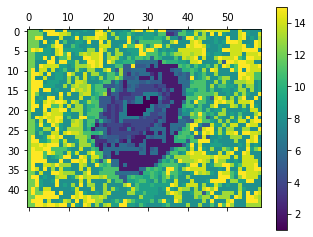

In [7]:
spec.plot_segments()

In [8]:
spec.filter_clusters(method='remove_singleton')
spec.filter_clusters(method='merge_background')


2020-06-08 17:20:14,445  SpectraRegion  INFO: Assigning clusters to background: {8, 9, 12, 13, 14, 15}


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

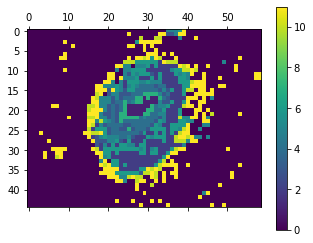

In [29]:
spec.plot_segments()

In [10]:
spec.consensus_spectra()

2020-06-08 17:20:14,764  SpectraRegion  INFO: Calculating consensus spectra
2020-06-08 17:20:14,846  SpectraRegion  INFO: Calculating consensus spectra done


{0: array([0.00504296, 0.00504296, 0.00504296, ..., 0.00217742, 0.00217742,
        0.00217742]),
 5: array([0.0040733 , 0.0040733 , 0.0040733 , ..., 0.00187448, 0.00187448,
        0.00187448]),
 6: array([0.00490824, 0.00490824, 0.00490824, ..., 0.00261432, 0.00261432,
        0.00261432]),
 11: array([0.00535501, 0.00535501, 0.00535501, ..., 0.00250629, 0.00250629,
        0.00250629]),
 3: array([0.00761661, 0.00761661, 0.00761661, ..., 0.0027142 , 0.0027142 ,
        0.0027142 ]),
 10: array([0.00675481, 0.00675481, 0.00675481, ..., 0.00387937, 0.00387937,
        0.00387937]),
 2: array([0.00763823, 0.00763823, 0.00763823, ..., 0.00323441, 0.00323441,
        0.00323441]),
 4: array([0.00756493, 0.00756493, 0.00756493, ..., 0.00229655, 0.00229655,
        0.00229655]),
 7: array([0.00653736, 0.00653736, 0.00653736, ..., 0.0018717 , 0.0018717 ,
        0.0018717 ]),
 1: array([0.00969619, 0.00969619, 0.00969619, ..., 0.00275836, 0.00275836,
        0.00275836])}

In [11]:
spec.consensus_similarity()

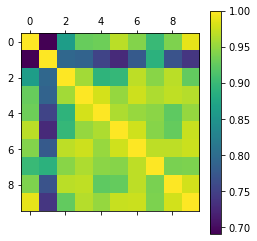

In [12]:
spec.plot_consensus_similarity()

2020-06-08 17:20:15,228  SpectraRegion  INFO: Found clusterLabels [0, 1, 2, 3, 4, 5, 6, 7, 10, 11]
2020-06-08 17:20:15,230  SpectraRegion  INFO: Processing clusterLabel 0
2020-06-08 17:21:04,099  SpectraRegion  INFO: Processing clusterLabel 1
2020-06-08 17:21:04,108  SpectraRegion  INFO: Processing clusterLabel 2
2020-06-08 17:21:04,353  SpectraRegion  INFO: Processing clusterLabel 3
2020-06-08 17:21:04,377  SpectraRegion  INFO: Processing clusterLabel 4
2020-06-08 17:21:04,426  SpectraRegion  INFO: Processing clusterLabel 5
2020-06-08 17:21:04,531  SpectraRegion  INFO: Processing clusterLabel 6
2020-06-08 17:21:04,704  SpectraRegion  INFO: Processing clusterLabel 7
2020-06-08 17:21:04,712  SpectraRegion  INFO: Processing clusterLabel 10
2020-06-08 17:21:04,751  SpectraRegion  INFO: Processing clusterLabel 11


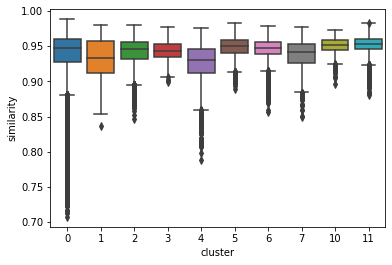

In [13]:
spec.plot_consensus_similarity(mode="spectra")

In [14]:
#spec.plot_inter_consensus_similarity()

# Differential Analysis

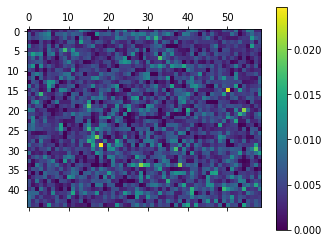

In [28]:
spec.mass_heatmap(12504)

2020-06-08 17:21:07,712  SpectraRegion  INFO: Processing Mass 12504 with best existing mass 12503.637158007228


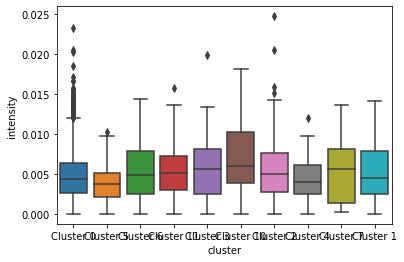

/usr/local/lib/python3.6/dist-packages/IPython/core/events.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


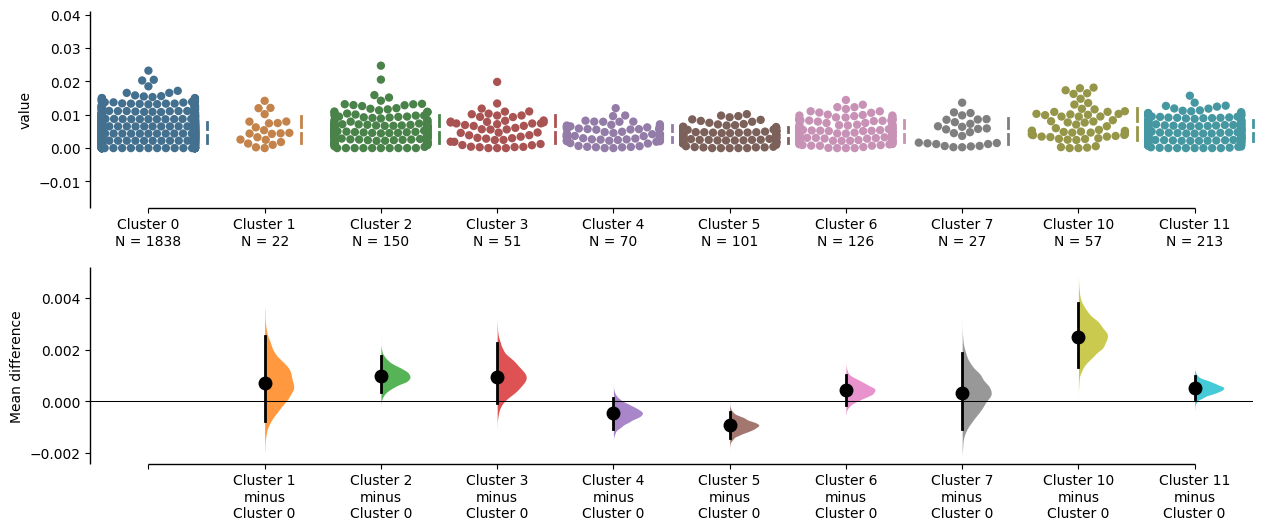

In [16]:
dfobj = spec.mass_dabest(12504)

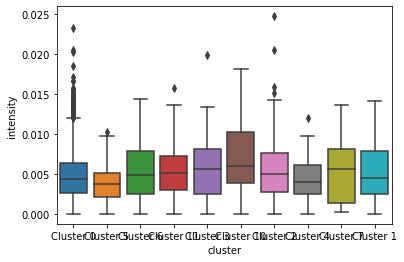

/usr/local/lib/python3.6/dist-packages/IPython/core/events.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


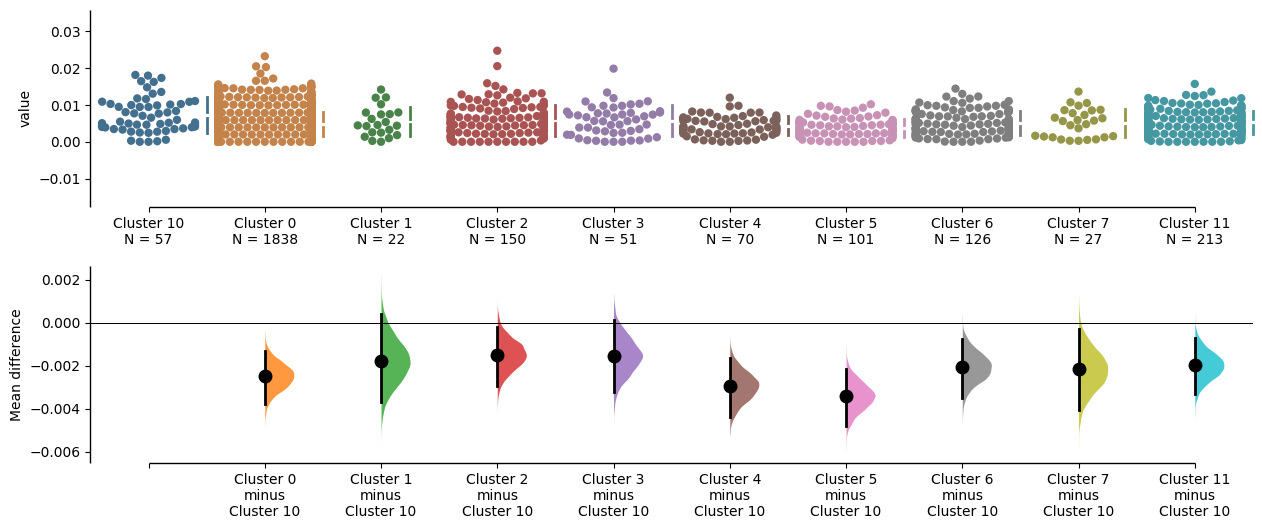

In [27]:
dfobj = spec.mass_dabest(12504, background=10)

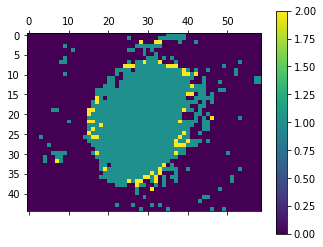

In [30]:
spec.plot_segments(highlight=10)

In [18]:
pw = ProteinWeights("protein_weights.tsv")

In [19]:
markerGenes = spec.find_all_markers(pw, includeBackground=True)
markerGenes

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

,clusterID,gene_ident,gene_mass,gene,protein_mass,avg_logFC,qvalue,num,anum,mean,median,num_bg,anum_bg,mean_bg,median_bg
0,0,mass_5677_827634141641,5677.827634,Tmsb4x,5679.4,-1.026677,1.477983e-140,1838.0,1838.0,0.022447,0.021208,817.0,817.0,0.045681,0.040836
1,0,mass_5679_336767354966,5679.336767,Tmsb4x,5679.4,-1.014866,2.960862e-130,1838.0,1836.0,0.017762,0.016837,817.0,817.0,0.035835,0.032603
2,0,mass_5680_84590056829,5680.845901,Tmsb4x,5679.4,-0.979965,1.063332e-116,1838.0,1832.0,0.014137,0.013247,817.0,817.0,0.027836,0.025389
3,0,mass_5682_355033781614,5682.355034,Tmsb4x,5679.4,-0.981259,8.971408e-103,1838.0,1819.0,0.011127,0.010160,817.0,816.0,0.021920,0.019370
4,0,mass_6379_574578337418,6379.574578,Usmg5,6381.4,-0.507156,1.966244e-61,1838.0,1836.0,0.018454,0.017551,817.0,817.0,0.026209,0.024770
5,0,mass_6381_083711550742,6381.083712,Usmg5,6381.4,-0.503152,4.078484e-54,1838.0,1833.0,0.015281,0.014529,817.0,817.0,0.021636,0.019936
6,0,mass_6645_182023882486,6645.182024,Fau,6647.8,0.591944,9.293818e-174,1838.0,1838.0,0.250928,0.241889,817.0,817.0,0.166494,0.159798
7,0,mass_6897_207270507635,6897.207271,Serf2,6899.8,-0.899898,1.838316e-115,1838.0,1838.0,0.027470,0.025712,817.0,817.0,0.051214,0.045165
8,0,mass_6897_207270507635,6897.207271,Serf1,6899.8,-0.899898,1.838316e-115,1838.0,1838.0,0.027470,0.025712,817.0,817.0,0.051214,0.045165
9,0,mass_6898_71640372096,6898.716404,Serf2,6899.8,-0.918775,5.456771e-116,1838.0,1838.0,0.025841,0.024258,817.0,817.0,0.048807,0.042498


In [20]:
spec.list_de_results()

[((0,), (1, 2, 3, 4, 5, 6, 7, 10, 11)),
 ((5,), (0, 1, 2, 3, 4, 6, 7, 10, 11)),
 ((6,), (0, 1, 2, 3, 4, 5, 7, 10, 11)),
 ((11,), (0, 1, 2, 3, 4, 5, 6, 7, 10)),
 ((3,), (0, 1, 2, 4, 5, 6, 7, 10, 11)),
 ((10,), (0, 1, 2, 3, 4, 5, 6, 7, 11)),
 ((2,), (0, 1, 3, 4, 5, 6, 7, 10, 11)),
 ((4,), (0, 1, 2, 3, 5, 6, 7, 10, 11)),
 ((7,), (0, 1, 2, 3, 4, 5, 6, 10, 11)),
 ((1,), (0, 2, 3, 4, 5, 6, 7, 10, 11))]

In [21]:
markerGenes.to_csv("marker_genes.tsv", sep="\t", index=False)

In [22]:
markerGenesNoBG = spec.find_all_markers(pw, includeBackground=False)
markerGenesNoBG

,clusterID,gene_ident,gene_mass,gene,protein_mass,avg_logFC,qvalue,num,anum,mean,median,num_bg,anum_bg,mean_bg,median_bg
0,0,mass_5677_827634141641,5677.827634,Tmsb4x,5679.4,-1.026677,1.477983e-140,1838,1838,0.022447,0.021208,817,817,0.045681,0.040836
1,0,mass_5679_336767354966,5679.336767,Tmsb4x,5679.4,-1.014866,2.960862e-130,1838,1836,0.017762,0.016837,817,817,0.035835,0.032603
2,0,mass_5680_84590056829,5680.845901,Tmsb4x,5679.4,-0.979965,1.063332e-116,1838,1832,0.014137,0.013247,817,817,0.027836,0.025389
3,0,mass_5682_355033781614,5682.355034,Tmsb4x,5679.4,-0.981259,8.971408e-103,1838,1819,0.011127,0.010160,817,816,0.021920,0.019370
4,0,mass_6379_574578337418,6379.574578,Usmg5,6381.4,-0.507156,1.966244e-61,1838,1836,0.018454,0.017551,817,817,0.026209,0.024770
5,0,mass_6381_083711550742,6381.083712,Usmg5,6381.4,-0.503152,4.078484e-54,1838,1833,0.015281,0.014529,817,817,0.021636,0.019936
6,0,mass_6645_182023882486,6645.182024,Fau,6647.8,0.591944,9.293818e-174,1838,1838,0.250928,0.241889,817,817,0.166494,0.159798
7,0,mass_6897_207270507635,6897.207271,Serf2,6899.8,-0.899898,1.838316e-115,1838,1838,0.027470,0.025712,817,817,0.051214,0.045165
8,0,mass_6897_207270507635,6897.207271,Serf1,6899.8,-0.899898,1.838316e-115,1838,1838,0.027470,0.025712,817,817,0.051214,0.045165
9,0,mass_6898_71640372096,6898.716404,Serf2,6899.8,-0.918775,5.456771e-116,1838,1838,0.025841,0.024258,817,817,0.048807,0.042498


In [36]:
print("Number of unique, differentially detected proteins (from masses): {}".format(len(set(markerGenesNoBG["gene"]))))

Number of unique, differentially detected proteins (from masses): 1292


In [23]:
markerGenesNoBG.to_csv("marker_genes_nobg.tsv", sep="\t", index=False)

In [24]:
deResTuple = spec.get_de_results( (2,) )[0]
deRes = spec.deres_to_df(deResTuple, pw)

In [25]:
deRes.to_csv("region1_cluster2.tsv", sep="\t")

In [26]:
spec.logger.info("test")